## Simple linear regression

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
## Read the datase
df=pd.read_excel('height-wt (2).xlsx')

In [59]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

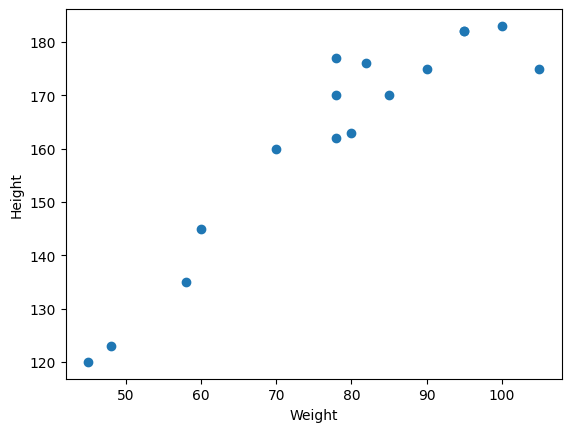

In [60]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [61]:
X=df[['Weight']] # independent  
y=df['Height'] # dependent 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) # out of 100 records 20 for test, 80 for train

In [64]:
X.shape,x_test.shape,x_train.shape

((16, 1), (4, 1), (12, 1))

In [65]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [66]:
scalar=StandardScaler()

In [67]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [68]:
x_train

array([[ 1.14020752],
       [ 0.8278219 ],
       [ 0.8278219 ],
       [-0.23428922],
       [-2.10860295],
       [-0.23428922],
       [-0.73410621],
       [ 0.51543628],
       [ 0.01561928],
       [ 1.45259314],
       [-1.35887746],
       [-0.10933497]])

In [69]:
x_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

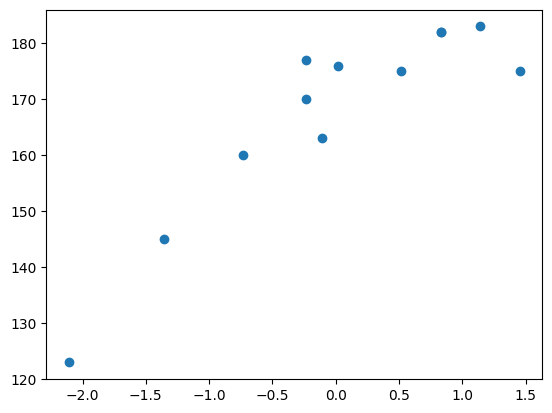

In [70]:
plt.scatter(x_train,y_train)

In [71]:
## Train the Simple linear regression model
from sklearn.linear_model import LinearRegression

In [72]:
regressor=LinearRegression()

In [73]:
regressor.fit(x_train,y_train)

LinearRegression()

In [74]:
print("The slope or coefficient of weight is ",regressor.coef_)

The slope or coefficient of weight is  [15.34724528]


In [75]:
print("The intercept of weight is", regressor.intercept_)

The intercept of weight is 167.58333333333334


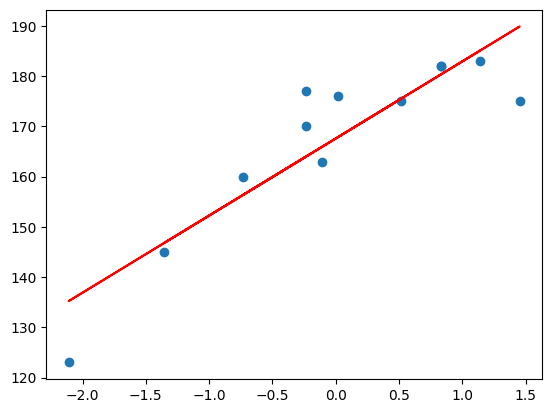

In [76]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

## Prediction of Test Data
1. Prediction height output = intercept + coef(weights)
2. y_pred_test = 15.34 + 167.583 * [Weight]

In [77]:
y_pred=regressor.predict(x_test)

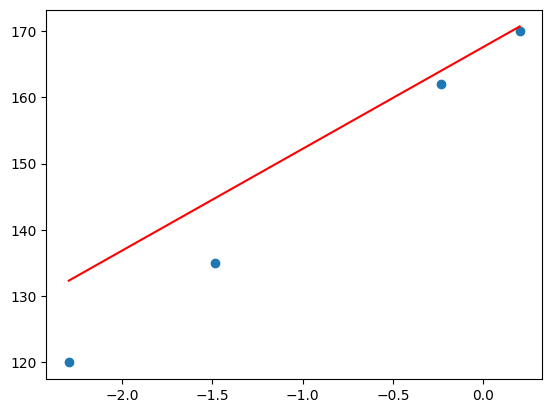

In [78]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,'r')

In [79]:
## Performance matrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean absolute Error ",mae)
print("R2 score ",r2) # AND also find value of adjusted r2
print("Adjust r2 score ",1-(1-r2)*(len(y_test)-1)/(len(y_test)*x_test.shape[1]-1))

Mean absolute Error  6.210844108319108
R2 score  0.8444135525153134
Adjust r2 score  0.8444135525153134


In [80]:
## with new data
xt=scalar.transform([[80]])
xt

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.10933497]])

In [81]:
print("The predicted height of 80 kgs is ",regressor.predict(xt))

The predicted height of 80 kgs is  [165.90534277]


## Assumptions

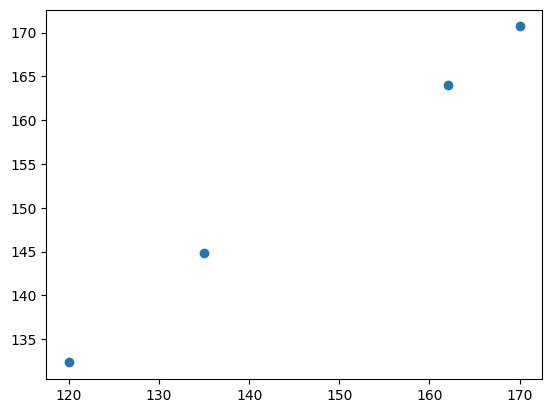

In [82]:
## Plot a scatter plot for predictions
plt.scatter(y_test,y_pred)

In [83]:
# if the scatter plot is linearly distributed then teh assumptions are good

In [84]:
## Residuals
residuals=y_test-y_pred
residuals

0    -12.345531
1     -9.810604
5     -1.987639
14    -0.699602
Name: Height, dtype: float64

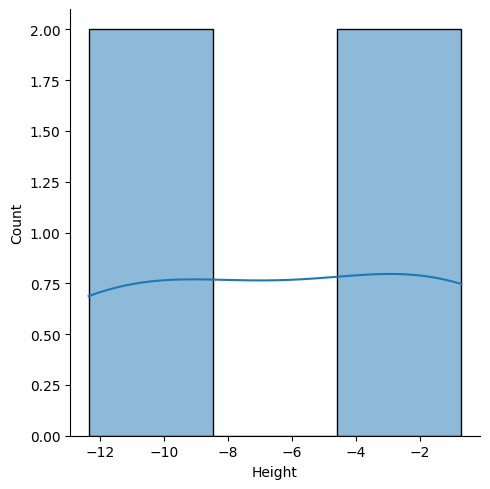

In [85]:
sns.displot(residuals,kde=True) # if we get a normal distribution then that's great

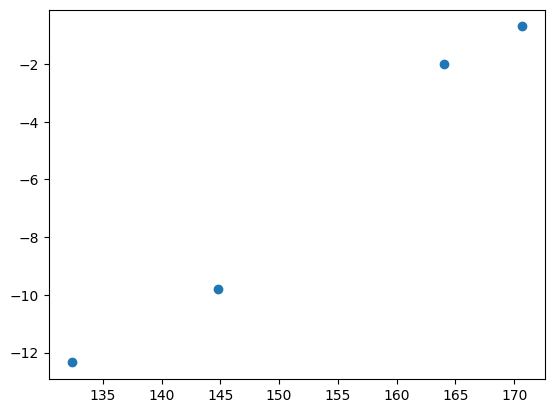

In [87]:
plt.scatter(y_pred,residuals) # if the graph is uniformly distributed then well and good